In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
x1 = pd.read_csv("./files/Data.csv")
x2 = pd.read_csv("./files/test.csv")

In [3]:
x1['ident'] = 'train'
x2['ident'] = 'test'

In [4]:
x2["SalePrice"] = None

In [5]:
df = pd.concat([x1, x2])


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [7]:
null_name = []
for i in df:
    if df[i].isnull().sum()>0:
        null_name.append(i)

In [8]:
null_name

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [9]:
df["MSZoning"].value_counts(dropna=False)

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: count, dtype: int64

In [10]:
df["MSZoning"].fillna(df["MSZoning"].mode()[0], inplace = True)
df["SaleType"].fillna(df["SaleType"].mode()[0], inplace = True)
df["GarageCond"].fillna(df["GarageCond"].mode()[0], inplace = True)
df["GarageQual"].fillna(df["GarageQual"].mode()[0], inplace = True)
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0], inplace = True)
df["GarageType"].fillna(df["GarageType"].mode()[0], inplace = True)
df["Functional"].fillna(df["Functional"].mode()[0], inplace = True)
df["KitchenQual"].fillna(df["KitchenQual"].mode()[0], inplace = True)
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace = True)
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0], inplace = True)
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0], inplace = True)
df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0], inplace = True)
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0], inplace = True)
df["BsmtCond"].fillna(df["BsmtCond"].mode()[0], inplace = True)
df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0], inplace = True)
df["Exterior1st"].fillna(df["Exterior1st"].mode()[0], inplace = True)
df["Utilities"].fillna(df["Utilities"].mode()[0], inplace=True)


In [11]:
df["GarageArea"].fillna(df["GarageArea"].mean(), inplace = True)
df["GarageCars"].fillna(df["GarageCars"].mean(), inplace = True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(), inplace = True)
df["BsmtHalfBath"].fillna(df["BsmtHalfBath"].mean(), inplace = True)
df["BsmtFullBath"].fillna(df["BsmtFullBath"].mean(), inplace = True)
df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean(), inplace = True)
df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].mean(), inplace = True)
df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].mean(), inplace = True)
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(), inplace = True)
df["SalePrice"].fillna(df["SalePrice"].mean(), inplace = True)
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace = True)
df["BsmtFinSF1"].fillna(df["BsmtFinSF1"].mean(), inplace = True)


In [12]:
df["MasVnrType"].fillna(value = "no", inplace= True)
df["Alley"].fillna(value = "no", inplace = True)
df["FireplaceQu"].fillna(value = "no", inplace = True)
df["PoolQC"].fillna(value = "no", inplace = True)
df["Fence"].fillna(value = "no", inplace = True)
df["MiscFeature"].fillna(value = "no", inplace = True)

In [13]:
df.select_dtypes(include = ["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'ident'],
      dtype='object')

In [ ]:
# def IQR(x):
#     q1=x.quantile(0.25)
#     q3=x.quantile(0.75)
#     iqr=q3-q1
#     lf=q1-(1.5*iqr)
#     uf=q3+(1.5*iqr)
#     print("LF---->",lf)
#     print("UF---->",uf)

In [24]:
for i in df.select_dtypes([int ,float]):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5*iqr)
    uf = q3 + (1.5 * iqr)
    if(df[i].median()>0):
        df[i] = df[i].clip(lf, uf)

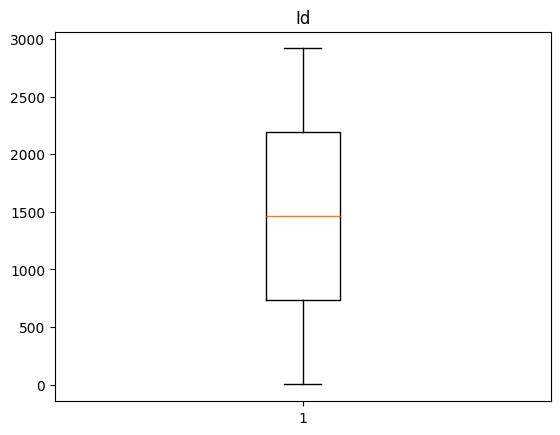

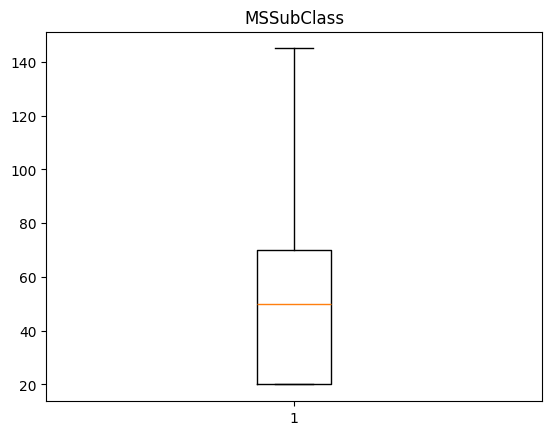

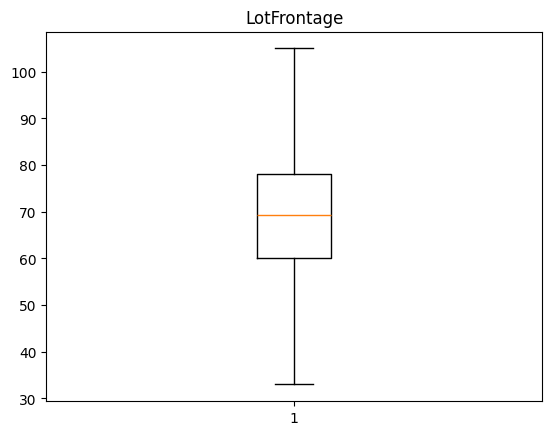

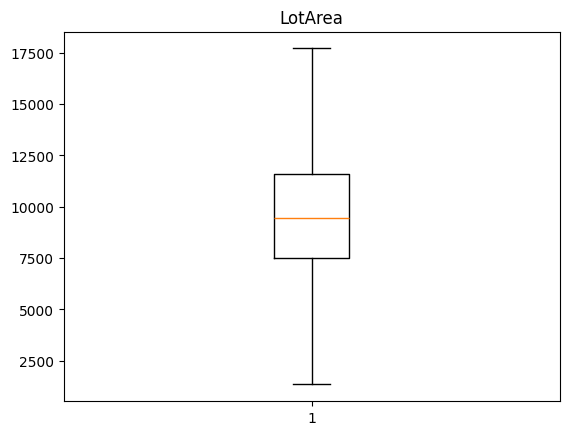

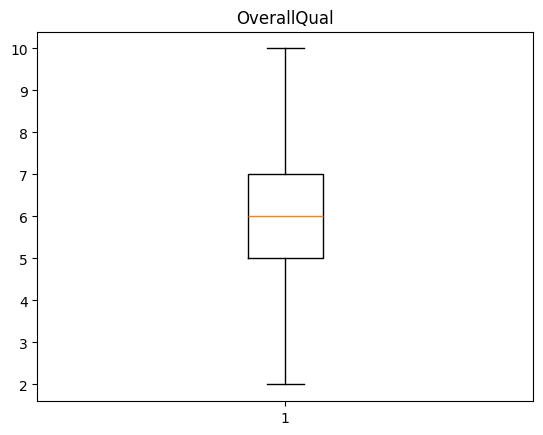

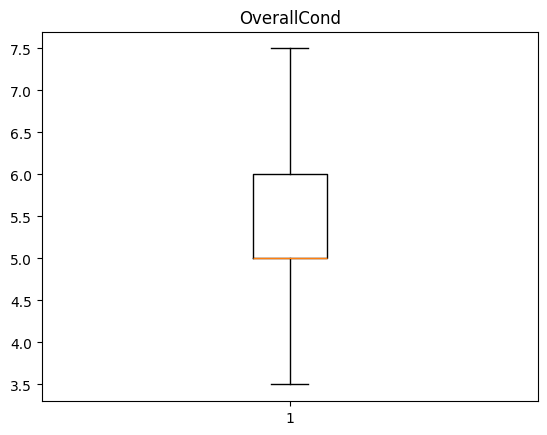

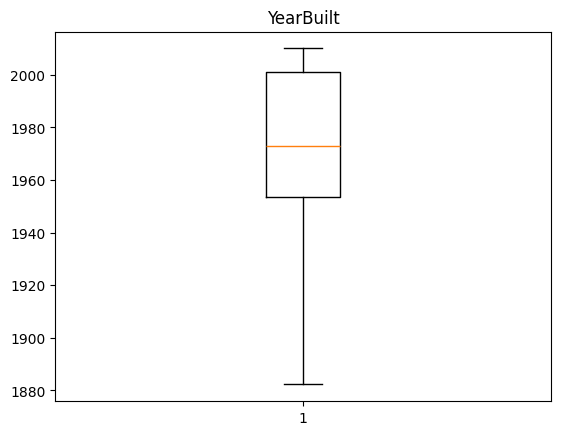

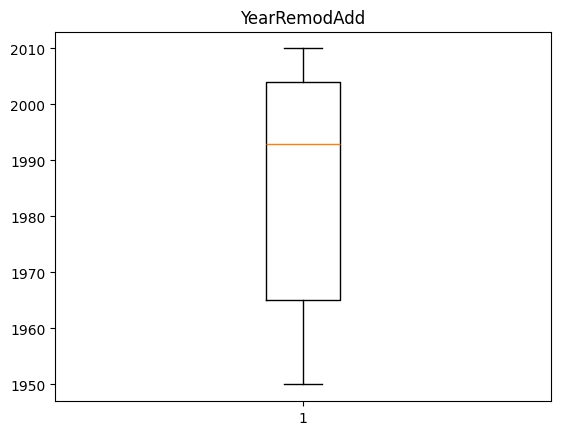

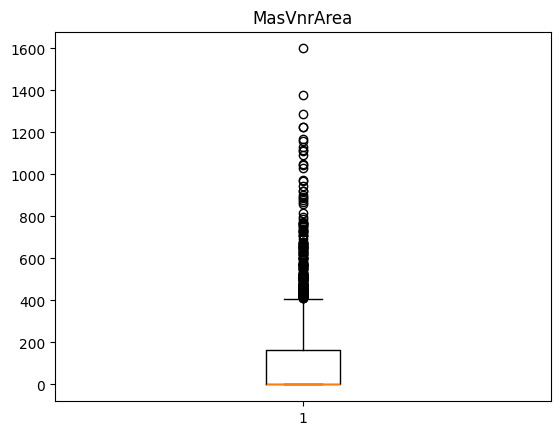

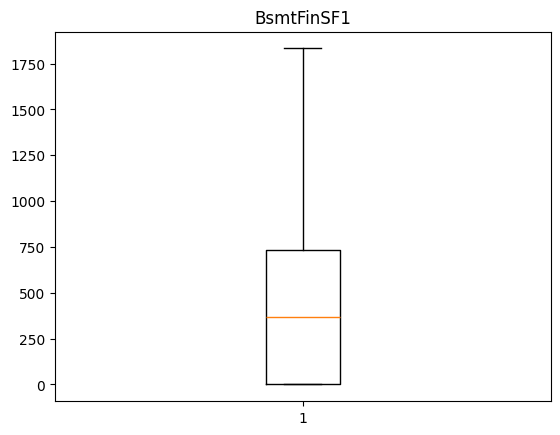

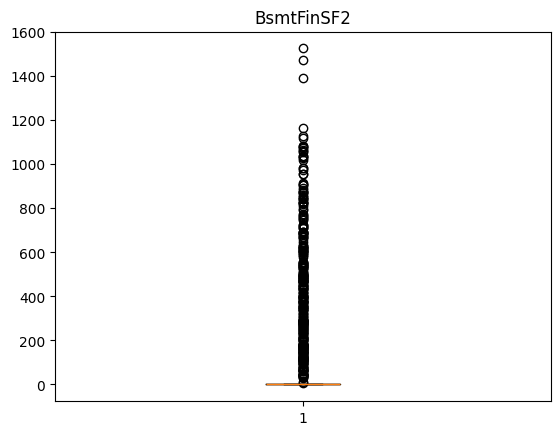

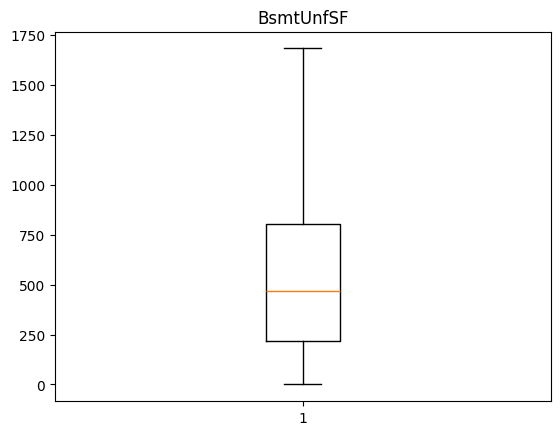

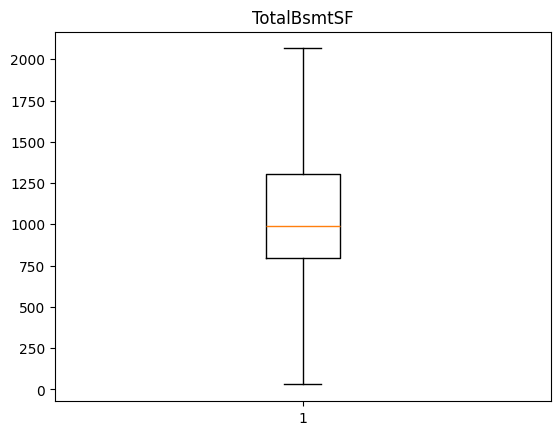

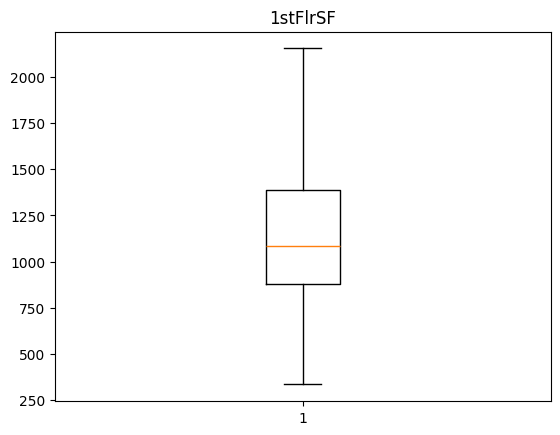

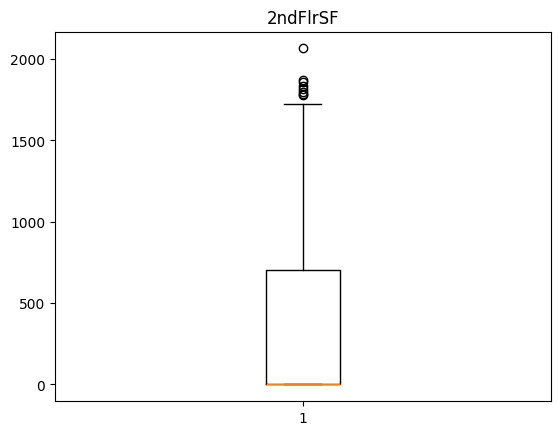

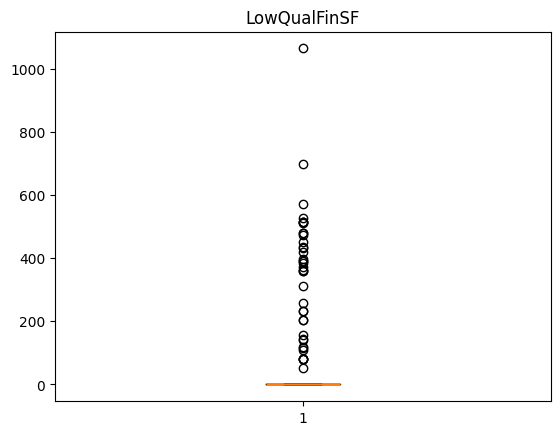

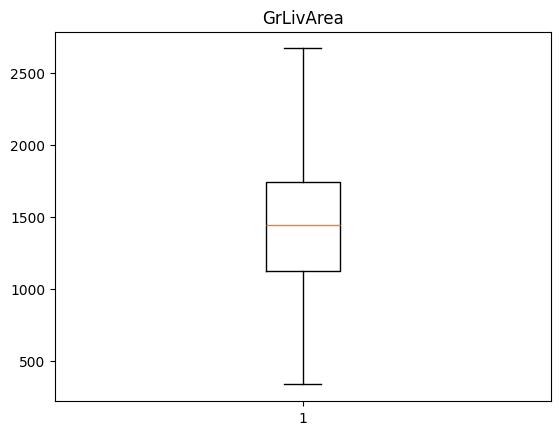

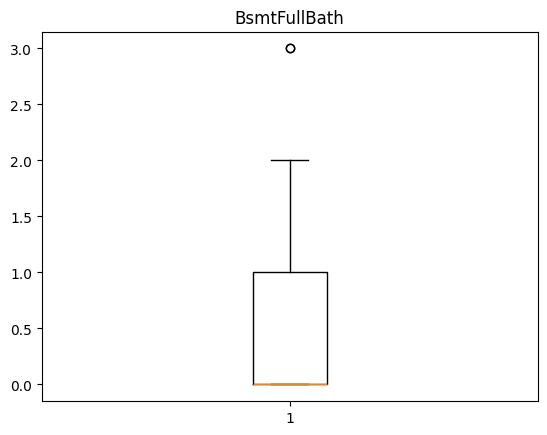

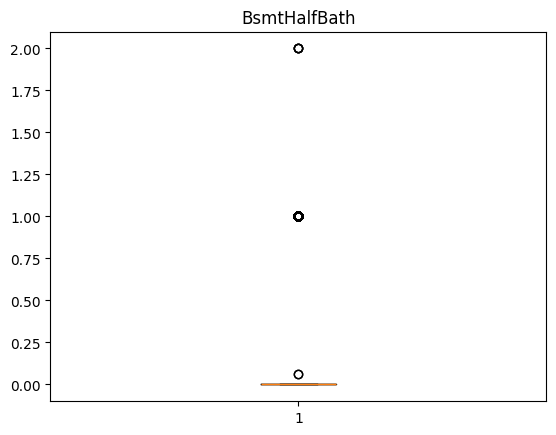

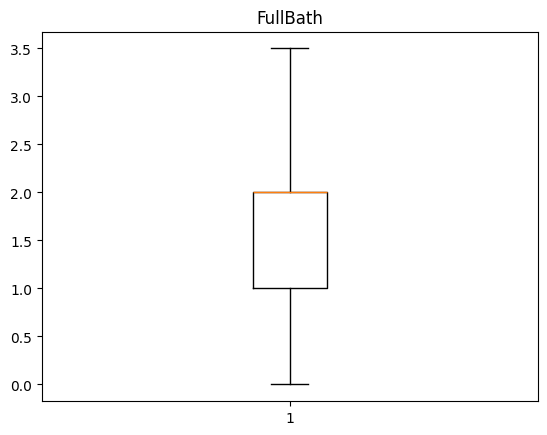

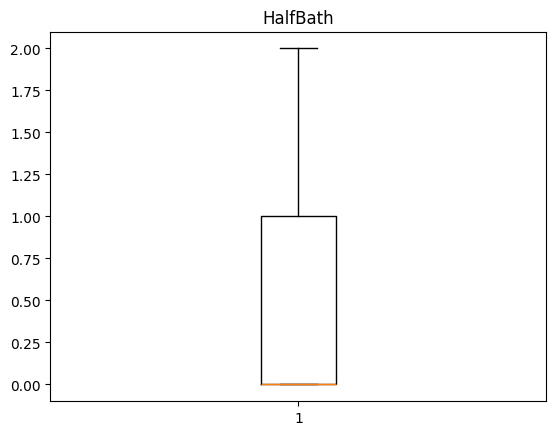

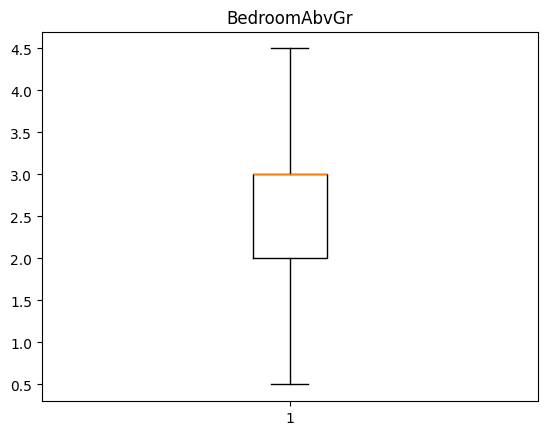

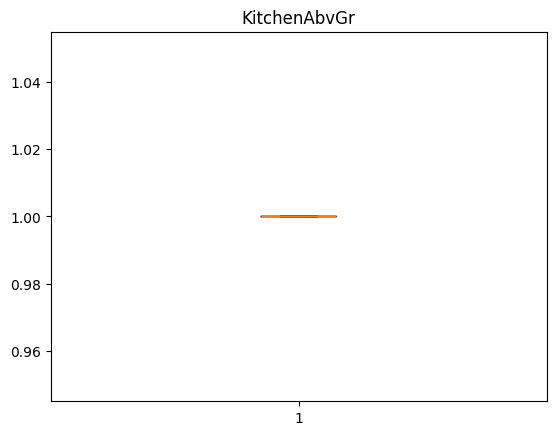

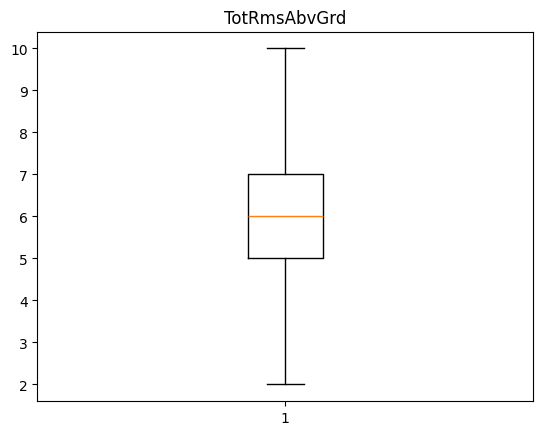

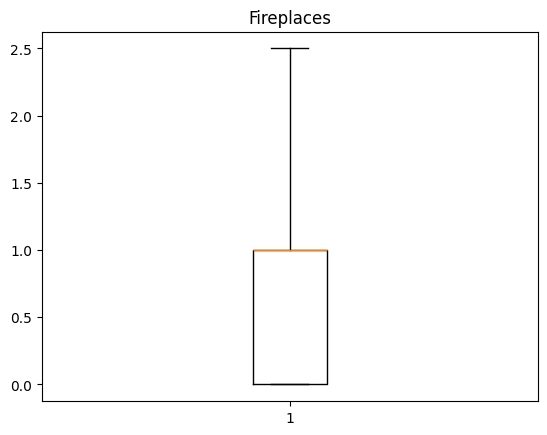

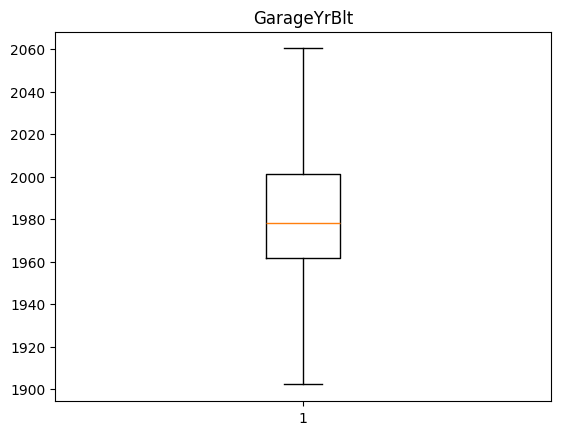

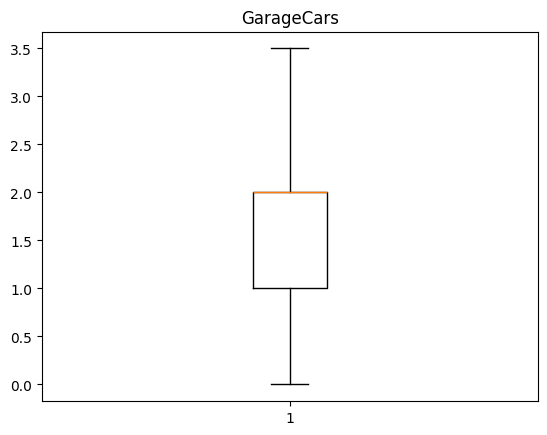

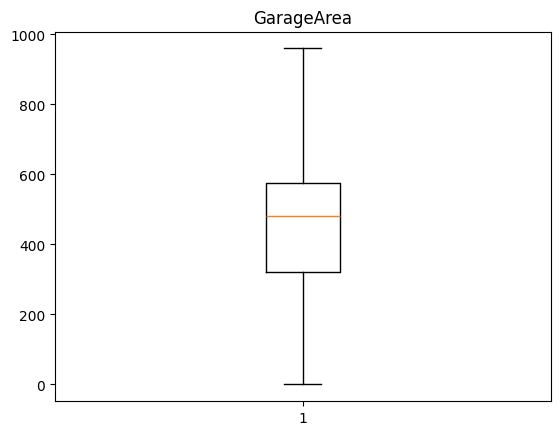

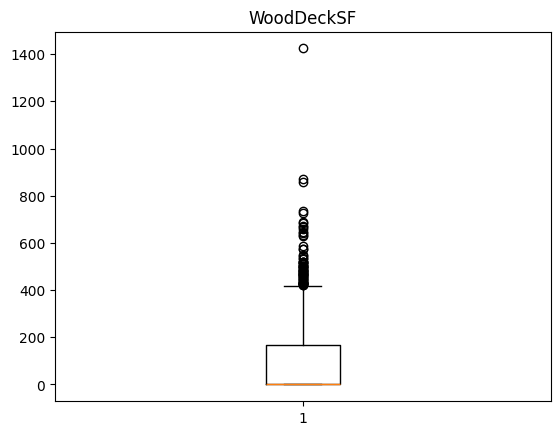

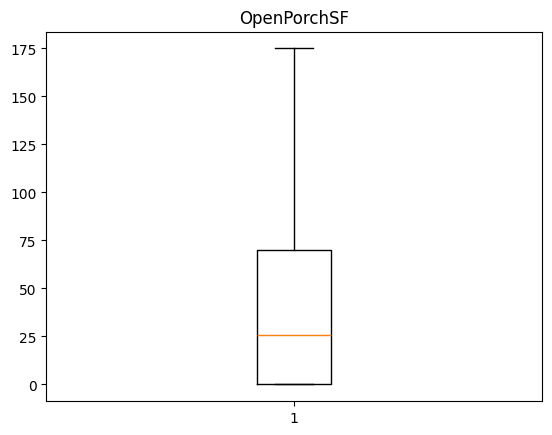

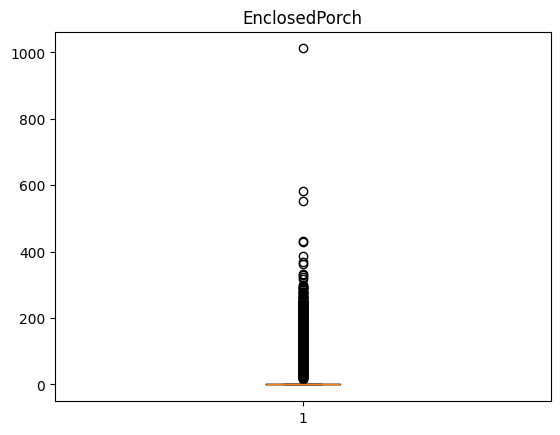

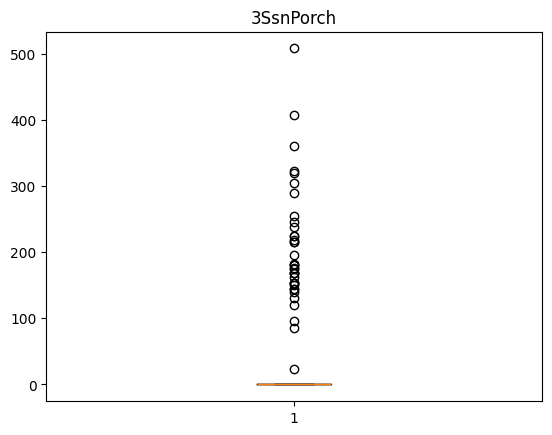

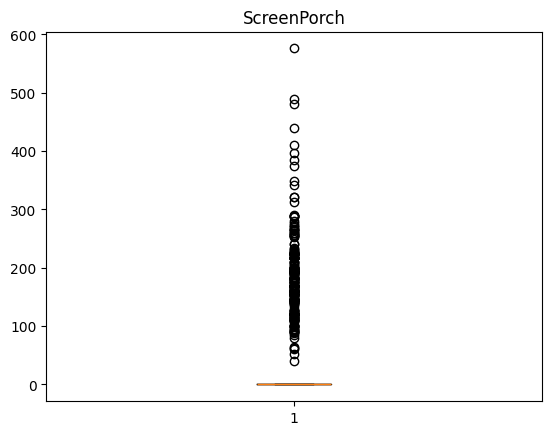

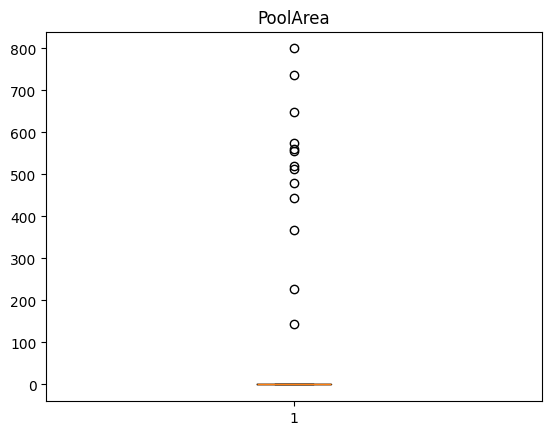

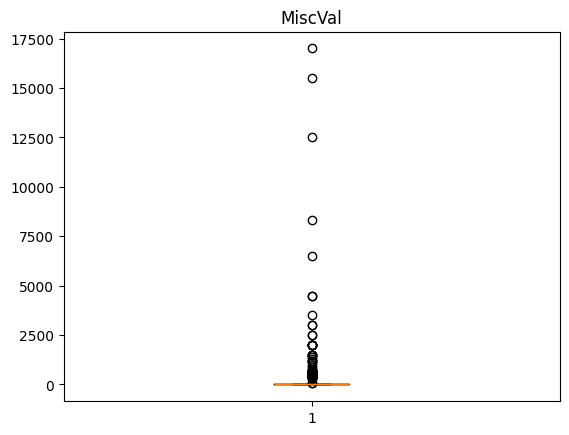

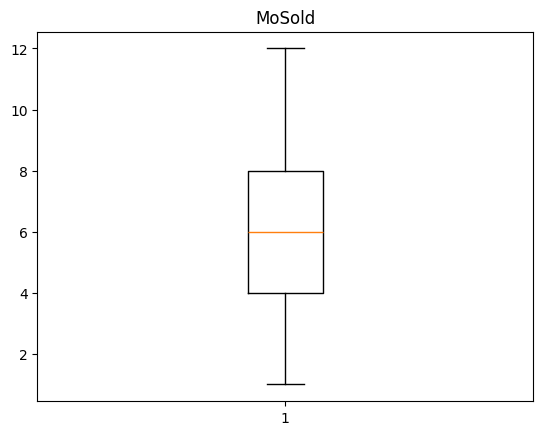

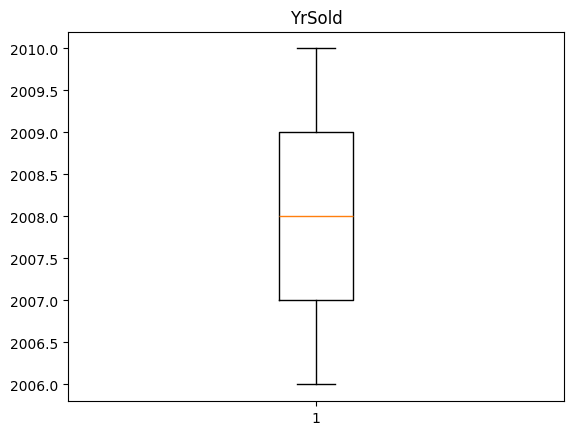

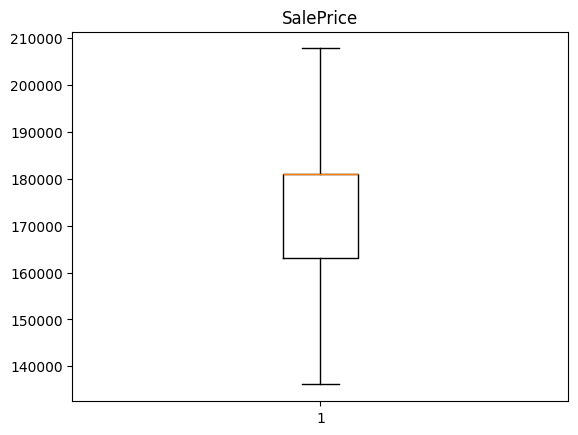

In [26]:
for i in df.select_dtypes([int, float]):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

In [31]:
x = df.drop(columns  = "SalePrice")
y = (df["SalePrice"])

In [ ]:
x_train, x_test, y_train, y_test =     

In [ ]:

# import seaborn as sns
# def outliers(x):
#     y=x.select_dtypes(include=[int,float])
#     for i in y:
#         sns.boxplot(x=df[i])
#         plt.title(i)
#         plt.show()

In [ ]:
# outliers(df)